# Real Estate Price Prediction(USA)

In [1]:
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score


In [2]:
# Load Dataset

file = "Realtor_data.csv"
df = pd.read_csv(file)

In [3]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354.0,3600.0,2022-03-25
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354.0,1616.0,2022-03-25
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354.0,3200.0,2022-03-24
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354.0,933.0,2022-03-24


## Exploratory Data Analysis And Cleaning

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   brokered_by     float64
 1   status          object 
 2   price           float64
 3   bed             float64
 4   bath            float64
 5   acre_lot        float64
 6   street          float64
 7   city            object 
 8   state           object 
 9   zip_code        float64
 10  house_size      float64
 11  prev_sold_date  object 
dtypes: float64(8), object(4)
memory usage: 203.8+ MB


In [10]:
# Change Datatype

df["brokered_by"] = df["brokered_by"].astype(object)
df["status"] = df["status"].astype("category")
df["state"] = df["state"].astype("category")

In [12]:
# Delete Columns

df = df.drop("street", axis=1)
df = df.drop("prev_sold_date", axis=1)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2226382 entries, 0 to 2226381
Data columns (total 10 columns):
 #   Column       Dtype   
---  ------       -----   
 0   brokered_by  object  
 1   status       category
 2   price        float64 
 3   bed          float64 
 4   bath         float64 
 5   acre_lot     float64 
 6   city         object  
 7   state        category
 8   zip_code     float64 
 9   house_size   float64 
dtypes: category(2), float64(6), object(2)
memory usage: 140.1+ MB


In [16]:
df.describe()

,price,bed,bath,acre_lot,zip_code,house_size
count,2.224841e+06,1.745065e+06,1.714611e+06,1.900793e+06,2.226083e+06,1.657898e+06
mean,5.241955e+05,3.275841e+00,2.496440e+00,1.522303e+01,5.218668e+04,2.714471e+03
std,2.138893e+06,1.567274e+00,1.652573e+00,7.628238e+02,2.895408e+04,8.081635e+05
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
25%,1.650000e+05,3.000000e+00,2.000000e+00,1.500000e-01,2.961700e+04,1.300000e+03
50%,3.250000e+05,3.000000e+00,2.000000e+00,2.600000e-01,4.838200e+04,1.760000e+03
75%,5.500000e+05,4.000000e+00,3.000000e+00,9.800000e-01,7.807000e+04,2.413000e+03
max,2.147484e+09,4.730000e+02,8.300000e+02,1.000000e+05,9.999900e+04,1.040400e+09


In [17]:
## Check for Missing Values

df.isnull().sum()

brokered_by      4533
status              0
price            1541
bed            481317
bath           511771
acre_lot       325589
city             1407
state               8
zip_code          299
house_size     568484
dtype: int64

In [20]:
# Remove rows with any missing values

dff = df.dropna()

In [22]:
dff.isnull().sum()

brokered_by    0
status         0
price          0
bed            0
bath           0
acre_lot       0
city           0
state          0
zip_code       0
house_size     0
dtype: int64

In [24]:
dff

,brokered_by,status,price,bed,bath,acre_lot,city,state,zip_code,house_size
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,Adjuntas,Puerto Rico,601.0,920.0
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,Adjuntas,Puerto Rico,601.0,1527.0
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,Juana Diaz,Puerto Rico,795.0,748.0
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,Ponce,Puerto Rico,731.0,1800.0
5,103378.0,for_sale,179000.0,4.0,3.0,0.46,San Sebastian,Puerto Rico,612.0,2520.0
...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,Richland,Washington,99354.0,3600.0
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,Richland,Washington,99354.0,1616.0
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,Richland,Washington,99354.0,3200.0
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,Richland,Washington,99354.0,933.0


In [26]:
# Make copies for EDA and modeling to handle encoding separately

dff_eda = dff.copy()
dff_model = dff.copy()

## Visualization

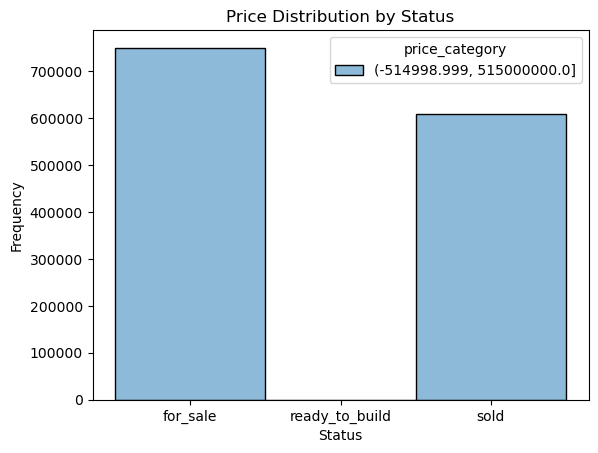

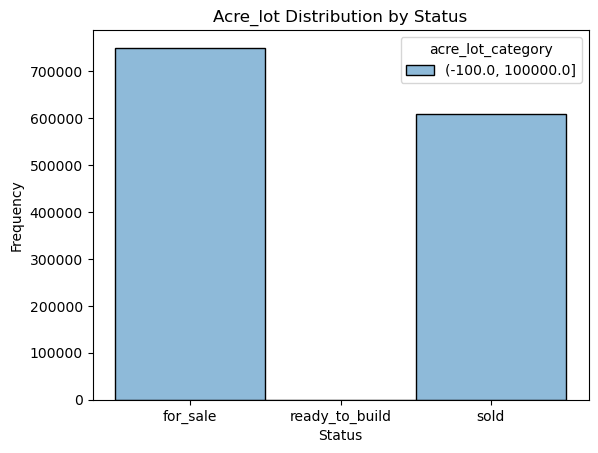

In [29]:

# Create price bins
dff_eda['price_category'] = pd.cut(dff_eda['price'], bins=1)

# Plot
sns.histplot(data=dff_eda, x='status', hue='price_category', bins=1)
plt.title('Price Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

# Create price bins
dff_eda['acre_lot_category'] = pd.cut(dff_eda['acre_lot'], bins=1)
# Plot
sns.histplot(data=dff_eda, x='status', hue='acre_lot_category', bins=1)
plt.title('Acre_lot Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

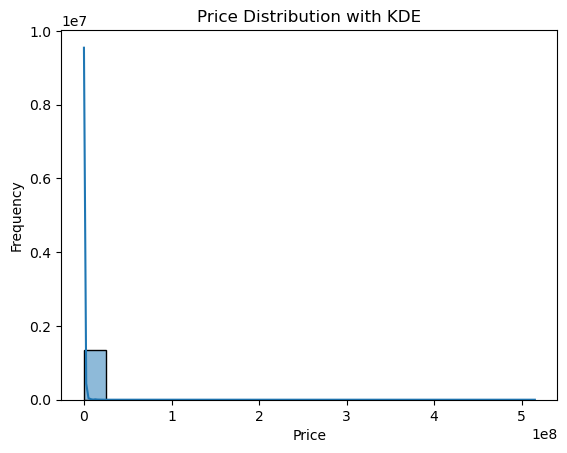

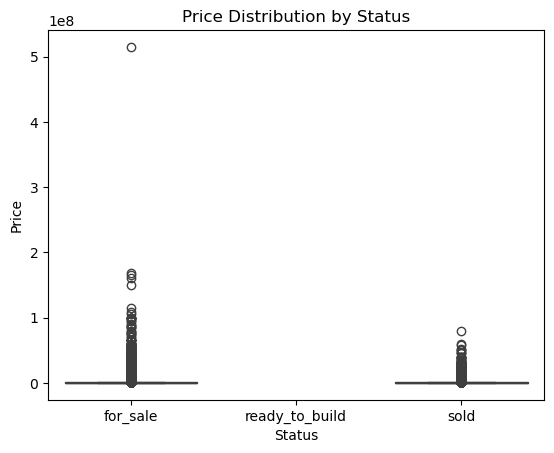

In [ ]:
### **1. Histogram: Distribution of a Numeric Variable**

sns.histplot(dff_eda['price'], kde=True, bins=20)
plt.title('Price Distribution with KDE')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


### **2. Boxplot: Visualizing Spread and Outliers**

sns.boxplot(x='status', y='price', data=dff_eda)
plt.title('Price Distribution by Status')
plt.xlabel('Status')
plt.ylabel('Price')
plt.show()


### **3. Pairplot: Pairwise Relationships**

sns.pairplot(dff_eda[['price', 'acre_lot', 'house_size']])  
plt.title('Pairplot of Price, acre_lot, and house_size')
plt.show()


### **4. Scatterplot: Relationship between Two Variables**

sns.scatterplot(x='bed', y='price', data=dff_eda)
plt.title('Price vs Bed')
plt.xlabel('Bed')
plt.ylabel('Price')
plt.show()


### **5. Correlation Heatmap: Heatmap of Correlation Matrix**

correlation = dff_eda[['price', 'acre_lot', 'house_size', 'bed', 'bath', 'zip_code']].corr() 
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


### **6. Countplot: Frequency of Categories**

sns.countplot(x='status', data=dff_eda)
plt.title('Count of Status Categories')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


### **7. Violin Plot: Distribution of a Numeric Variable by Category**

sns.violinplot(x='status', y='price', data=dff_eda)
plt.title('Price Distribution by Status (Violin Plot)')
plt.xlabel('Status')
plt.ylabel('Price')
plt.show()


### **9. Barplot: Average Price by Status**

sns.barplot(x='status', y='price', data=dff_eda, ci='sd')  # 'ci' shows confidence interval
plt.title('Average Price by Status')
plt.xlabel('Status')
plt.ylabel('Average Price')
plt.show()


### **10. Heatmap: Missing Values in Data**

sns.heatmap(dff_eda.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()


plt.tight_layout()  
plt.show()



In [ ]:
### 🧑‍🏫 **Summary of Plots**
1. **Histogram** — Visualize the distribution of numerical data.
2. **Boxplot** — Identify outliers and distribution spread.
3. **Pairplot** — Examine relationships between multiple variables.
4. **Scatterplot** — Study relationships between two variables.
5. **Correlation Heatmap** — Investigate correlations between multiple variables.
6. **Countplot** — Visualize counts of categorical data.
7. **Violin Plot** — Distribution by category.
8. **KDE Plot** — Smoothed version of a histogram.
9. **Barplot** — Compare categorical means.
10. **Heatmap of Missing Values** — Identify missing data visually.